<a href="https://colab.research.google.com/github/20-hayato/machine_learning_test/blob/main/lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
from sklearn.datasets import fetch_california_housing
california_housing_data = fetch_california_housing()

# データのインポート
exp_data = pd.DataFrame(california_housing_data.data, columns=california_housing_data.feature_names)
tar_data = pd.DataFrame(california_housing_data.target, columns=['MedHouseVal'])

# データの結合
data = pd.concat([exp_data, tar_data], axis=1)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


,AveRooms,MedHouseVal
count,20640.000000,20640.000000
mean,5.429000,2.068558
std,2.474173,1.153956
min,0.846154,0.149990
25%,4.440716,1.196000
50%,5.229129,1.797000
75%,6.052381,2.647250
max,141.909091,5.000010


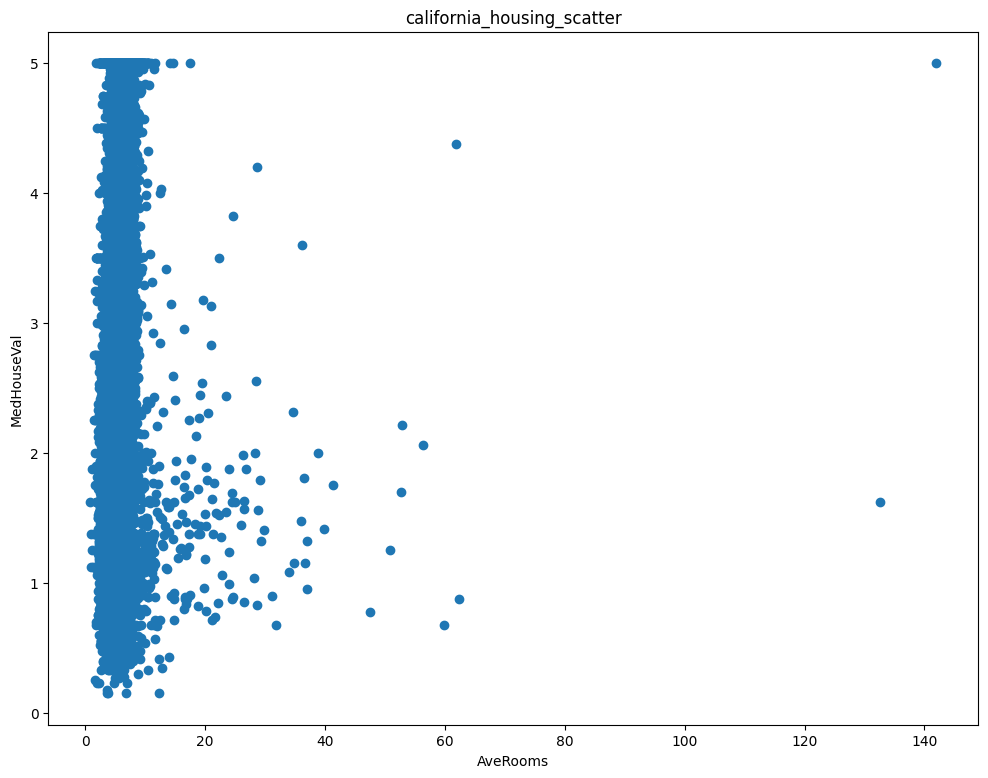

In [46]:
exp_var = 'AveRooms'
tar_var = 'MedHouseVal'

# 散布図を表示
plt.figure(figsize=(12, 9))
plt.scatter(data[exp_var], data[tar_var])
plt.xlabel(exp_var)
plt.ylabel(tar_var)
plt.title('california_housing_scatter')
plt.savefig('california_housing_scatter.png')
data[[exp_var, tar_var]].describe()

LinearRgression MSE: 1.0670408597694008
Lasso MSE: 1.1003588369383184
Ridge MSE: 1.0670408079714335


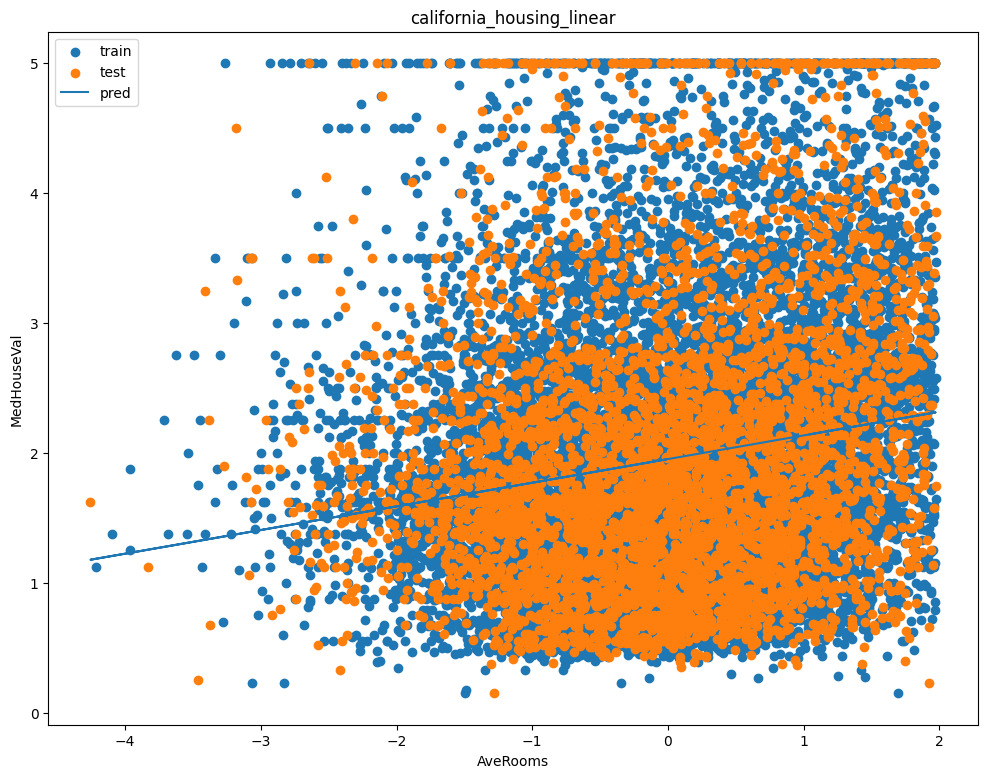

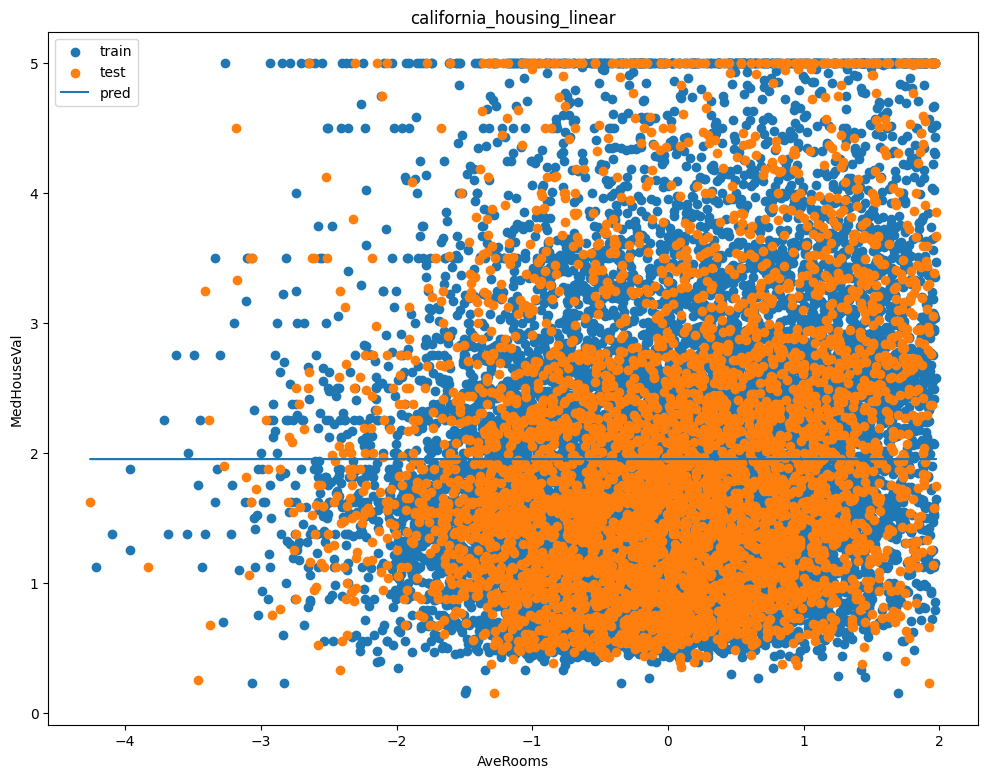

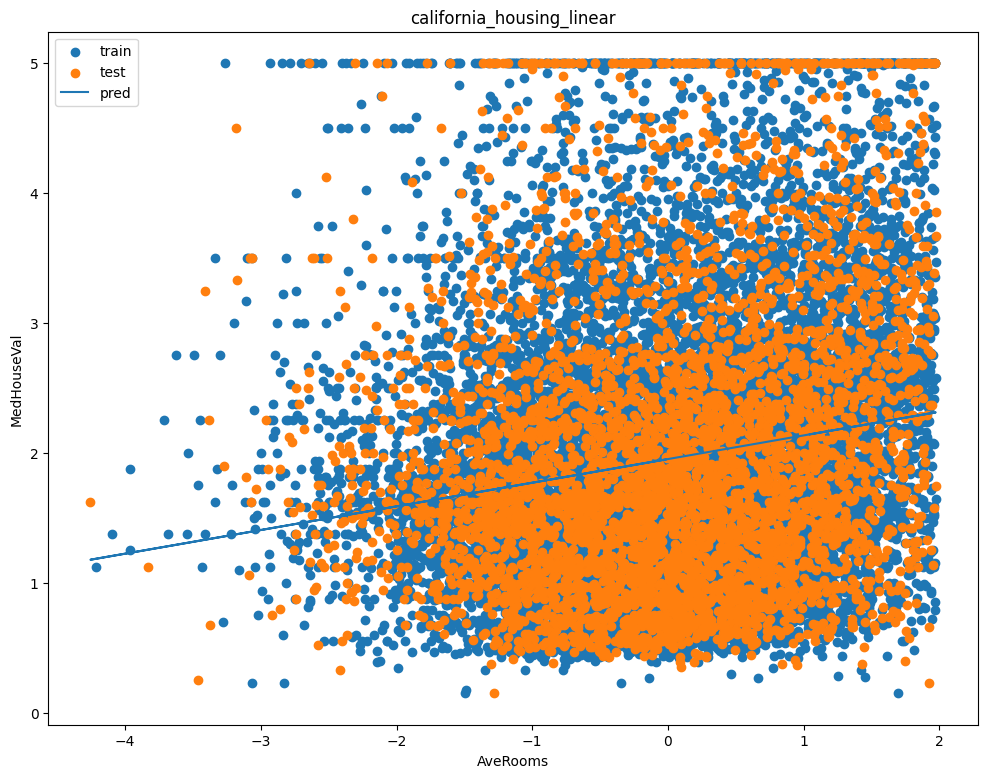

In [50]:
from sklearn.model_selection import train_test_split

# 外れ値処理
q_95 = data[exp_var].quantile(0.95)
data = data[data[exp_var] < q_95]

# ホールドアウト法で分割
X = data[exp_var].values.reshape(-1, 1)
y = data[tar_var].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 線形回帰
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_test_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test,y_test_pred)
print("LinearRgression MSE:", lr_mse)

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_test_pred, label='pred')
plt.xlabel(exp_var)
plt.ylabel(tar_var)
plt.title('california_housing_linear')
plt.legend()

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Ridge
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train,y_train)
y_test_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test,y_test_pred)
print("Ridge MSE:", ridge_mse)

plt.figure(figsize=(12, 9))
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_test_pred, label='pred')
plt.xlabel(exp_var)
plt.ylabel(tar_var)

plt.title('california_housing_linear')
plt.legend()

In [57]:
# 重回帰分析
# データのインポート
exp_data = pd.DataFrame(california_housing_data.data, columns=california_housing_data.feature_names)
tar_data = pd.DataFrame(california_housing_data.target, columns=['MedHouseVal'])

# データの結合
data = pd.concat([exp_data, tar_data], axis=1)
data.head()

exp_vars = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
tar_var = 'MedHouseVal'

for exp_var in exp_vars:
    q_95 = data[exp_var].quantile(0.95)
    data = data[data[exp_var] < q_95]

X = data[exp_vars]
y = data[[tar_var]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_test_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test,y_test_pred)
print("LinearRgression MSE:", lr_mse)

ridge_model=Ridge(alpha=1)
ridge_model.fit(X_train,y_train)
y_test_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test,y_test_pred)
print("Ridge MSE:", ridge_mse)

from sklearn.linear_model import Lasso
ls_model = Lasso(alpha=1)
ls_model.fit(X_train, y_train)
y_test_pred = ls_model.predict(X_test)
ls_mse = mean_squared_error(y_test,y_test_pred)
print("Lasso MSE:", ls_mse)


LinearRgression MSE: 0.4032663413030076
Ridge MSE: 0.40326860617445565
Lasso MSE: 1.0484391265204853
